# Breast Cancer Defining

## 1. Objective/Business Goal
### In this project, different types Machine Learning Techniques will bes used to determine breast cancer. 

Let's do quick review what is breast cancer. At the beggining, the breast cancer might not show any symptoms. Mostly, a tumor might be too small to be felt or seen, however an abnormality can still be seen on a mammogram. If a tumor can be felt, the first sign is usually a new lump in the breast that was not there before. However, not all lumps are cancer.

Symptoms of the most common breast cancers include the following.

- A lump in the breast or thickening of tissue that feels different from the surrounding tissue and has recently appeared.
- Breast pain.
- Red skin with pits all over the chest.
- Swelling of all or part of the breast.
- Nipple discharge other than breast milk.
- Bloody discharge from the nipple.
- Peeling, peeling or flaking of the skin on the nipple or breast.
- Sudden, unexplained change in the shape or size of the breasts.
- Inverted nipple.
- Changes in the appearance of breast skin.
- A lump or swelling under the armpit.

As breast cancer one of the most spreaded cancers in the world, the awareness of breast cancer is incredibly important as early detection, it is significant to find out the disease when it is in most treatable stage. 

The following Machine Learning Techniques will be used in this project to determine diagnostic accuracy of breast cancer.

- Logistic Regression Classification.
- K-Nearest Neighbor Classification.
- SVM (Support Vector Machine) Classification.
- Decision Tree Classification. 
- Naive Bayes Classification.
- Random Forest Classification.

## 2. Data

The data is Breast Cancer Wisconsin(Diagnostic) Data Set.

Variables:

- id: ID Number.
- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign).
- radius_mean: mean of distances from center to points on the perimeter.
- texture_mean: standard deviation of gray-scale values.
- perimeter_mean: mean size of the core tumor.
- area_mean: mean size of area.
- smoothness_mean: mean of local variation in radius lengths.
- compactness_mean: mean of perimeter^2 / area - 1.0.
- concavity_mean: mean of severity of concave portions of the contour.
- concave points_mean: mean for number of concave portions of the contour.

In [1]:
# Importing Essential libraries:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pltm

In [2]:
# Downloading data

df = pd.read_csv('/Users/ruhidmirzayev/Desktop/ ML_Projects/Projects/Breast_Cancer/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Explaratory Data Analysis / Data Visualisation

In [3]:
# Let's choose variables we need. As we see below, we do not hav Null values which is great.

df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean']] 
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    object 
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concave points_mean  569 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.1+ KB


In [4]:
# Let's explore the variables. 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.0740,0.2012


B    357
M    212
Name: diagnosis, dtype: int64


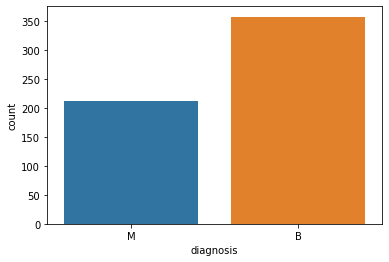

In [5]:
#Counting numbers of M = malignant, B = benign.

ax = sb.countplot(x='diagnosis', data=df)
print(df['diagnosis'].value_counts())

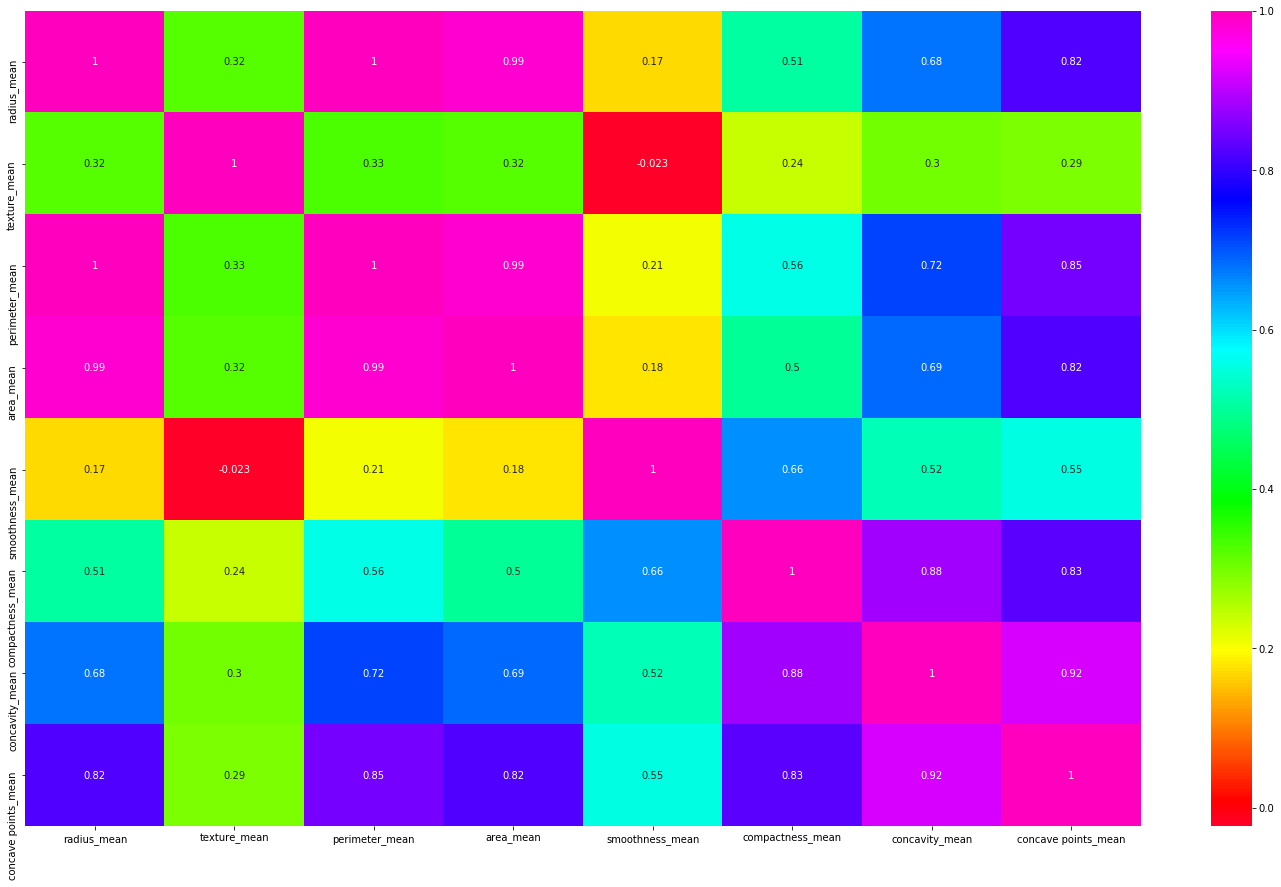

In [6]:
# Let's draw a heatmap with the numeric values in each cell.

corr = df.corr()
pltm.figure(figsize=(25,15))
sb.heatmap(corr, cmap='gist_rainbow', annot = True)
pltm.show()

As we see from heatmap area mean is highly correlated with perimeter mean and radius mean. This is because when we calculate area we need to use radius where radius is always corelated with perimeter as well. So we need to drop perimeter mean and area mean variables for efficency.

In [7]:
df = df.drop(['perimeter_mean', 'area_mean'], axis = 1)

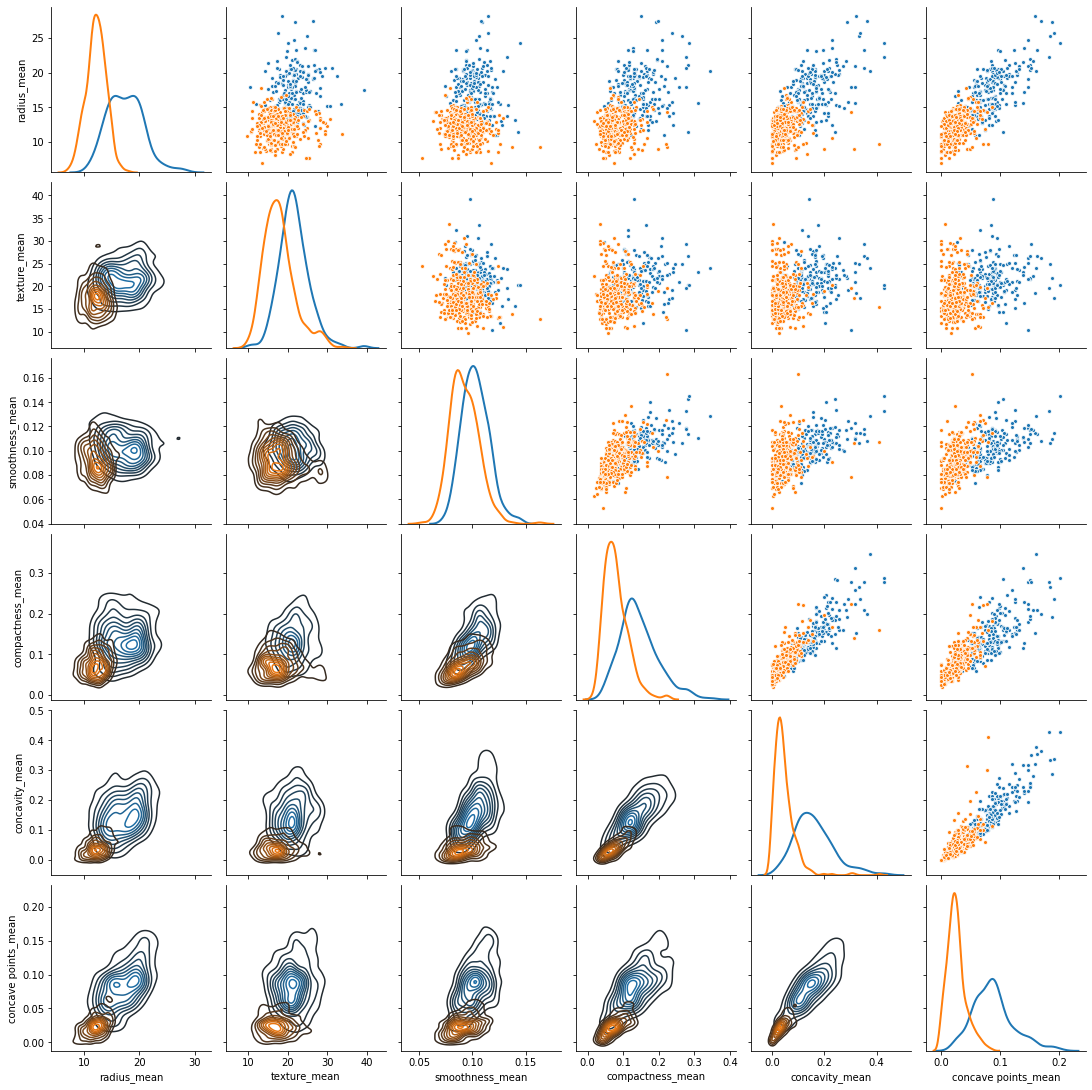

In [8]:
# Paired density and scarplot matrix.

r = sb.PairGrid(df,hue='diagnosis', diag_sharey=False)
r.map_upper(sb.scatterplot, s=15)
r.map_lower(sb.kdeplot)
r.map_diag(sb.kdeplot, lw=2)

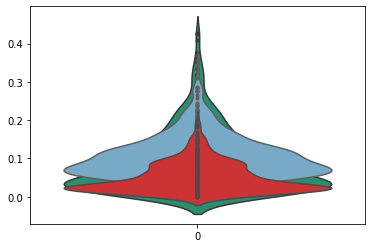

In [9]:
# Let's look distribution of the following variables.
# Choosing variables
df1 = df['compactness_mean']
df2 = df['concavity_mean']
df3 = df['concave points_mean']

# Seaborn Violinplots
sb.violinplot(data=df2, palette="Dark2", inner="points", orient="v")
sb.violinplot(data=df1, palette="Blues", inner="points", orient="v")
sb.violinplot(data=df3, palette="Set1", inner="points", orient="v")

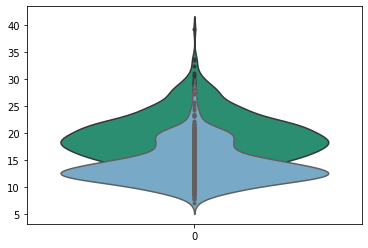

In [10]:
df4 = df['radius_mean']
df5 = df['texture_mean']

sb.violinplot(data=df5, palette="Dark2", inner="points", orient="v")
sb.violinplot(data=df4, palette="Blues", inner="points", orient="v")

## 4. Pre-processing 

In [11]:
# Let's replace Malignant and Benign respectively with 1 and 0 in order to use NumPy

df.replace(to_replace = {
    'diagnosis': {'B':0, 'M':1}}, inplace = True)

In [12]:
# Transforming selected features to NumPy

X = np.asarray(df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean']])

# Standardasing data

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.29767572,  1.09706398, -2.07333501,  1.56846633,  3.28351467,
         2.65287398,  2.53247522],
       [ 1.29767572,  1.82982061, -0.35363241, -0.82696245, -0.48707167,
        -0.02384586,  0.54814416],
       [ 1.29767572,  1.57988811,  0.45618695,  0.94221044,  1.05292554,
         1.36347845,  2.03723076],
       [ 1.29767572, -0.76890929,  0.25373211,  3.28355348,  3.40290899,
         1.91589718,  1.45170736],
       [ 1.29767572,  1.75029663, -1.15181643,  0.28037183,  0.53934045,
         1.37101143,  1.42849277]])

In [13]:
# Transforming target variable to NumPy

y = np.asarray(df['diagnosis'])
y [0:5]

array([1, 1, 1, 1, 1])

In [14]:
# Importing Train Test Split

from sklearn.model_selection import train_test_split

In [15]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 7) (455,)
Test set: (114, 7) (114,)


In [16]:
from sklearn.metrics import classification_report
from sklearn import metrics

## 5. Model Evaluation

The following classifications will be used as follow:

1. Logistic Regression.
2. K-Nearest Neighbor.
3. SVM (Support Vector Machine).
4. Decision Tree.
5. Naive Bayes.
6. Random Forest.

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# We defining the model
LR = LogisticRegression(C=10)

# We train the model
LR.fit(X_train, y_train)

# We predict target values
yhat = logreg.predict(X_test)

# Predicted values vs Actual values

print(yhat[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [18]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


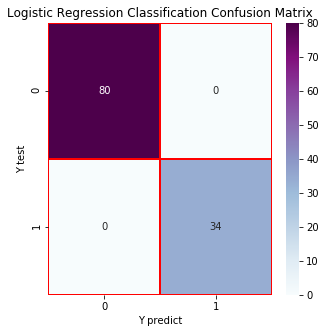

In [19]:
# Canfusing Matrix

from sklearn.metrics import confusion_matrix

LR_cm = confusion_matrix(y_test, yhat)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(LR_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('Logistic Regression Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### K-Nearest Neighbor.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
KNN.fit(X_train, y_train)

# We predict target values
yhat1 = KNN.predict(X_test)

# Predicted values vs Actual values

print(yhat1[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [21]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat1)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat1, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat1)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


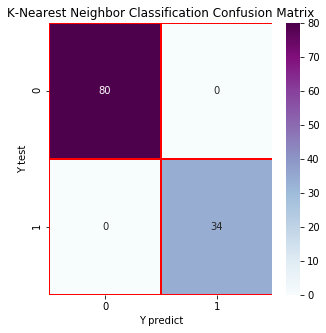

In [22]:
from sklearn.metrics import confusion_matrix

KNN_cm = confusion_matrix(y_test, yhat1)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(KNN_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('K-Nearest Neighbor Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### SVM (Support Vector Machine)

In [23]:
# Importing Libraries

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
SVM = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
SVM.fit(X_train, y_train)

# We predict target values
yhat2 = SVM.predict(X_test)

# Predicted values vs Actual values

print(yhat2[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [24]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat2)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat2, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat2)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


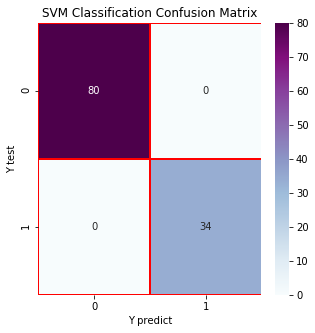

In [25]:
from sklearn.metrics import confusion_matrix

SVM_cm = confusion_matrix(y_test, yhat2)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(SVM_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('SVM Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
DT = DecisionTreeClassifier(random_state=9)

# We train model
DT.fit(X_train, y_train)

# We predict target values
yhat3 = DT.predict(X_test)

# Predicted values vs Actual values

print(yhat3[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [27]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat3)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat3, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat3)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


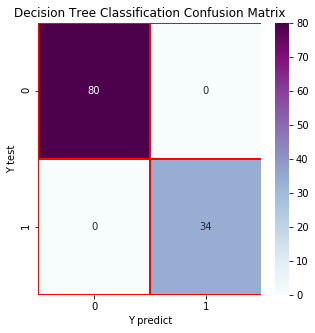

In [28]:
from sklearn.metrics import confusion_matrix

DT_cm = confusion_matrix(y_test, yhat3)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(DT_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('Decision Tree Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# We define the model
NB = GaussianNB()

# We train model
NB.fit(X_train, y_train)

# We predict target values
yhat4 = NB.predict(X_test)

# Predicted values vs Actual values

print(yhat4[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [30]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat4)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat4, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat4)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


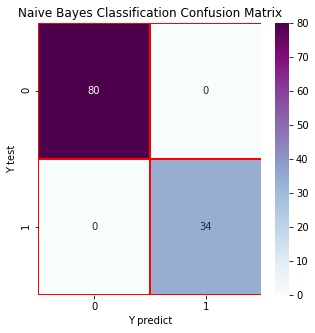

In [31]:
from sklearn.metrics import confusion_matrix

NB_cm = confusion_matrix(y_test, yhat4)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(NB_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('Naive Bayes Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
RF = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
RF.fit(X_train, y_train)

# We predict target values
yhat5 = RF.predict(X_test)

# Predicted values vs Actual values

print(yhat5[0:20])
print(y_test[0:20])

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [33]:
# Jaccard Score
from sklearn.metrics import jaccard_score

print('Jaccard Score is {0:0.4f}'.format(jaccard_score(y_test, yhat5)))

# F1 Score
from sklearn.metrics import f1_score

print('F1 Score is  {0:0.4f}'.format(f1_score(y_test, yhat5, average='weighted')))

# Precision and Recall
from sklearn.metrics import average_precision_score

print('Average precision-recall score {0:0.4f}'.format(average_precision_score(y_test, yhat5)))

Jaccard Score is 1.0000
F1 Score is  1.0000
Average precision-recall score 1.0000


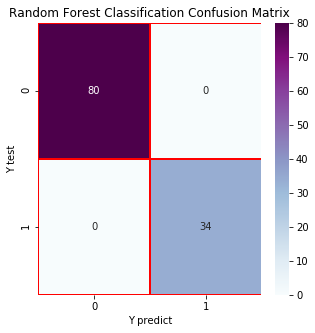

In [34]:
from sklearn.metrics import confusion_matrix

RF_cm = confusion_matrix(y_test, yhat5)
f, ax = pltm.subplots(figsize=(5,5))
sb.heatmap(RF_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
pltm.title('Random Forest Classification Confusion Matrix')
pltm.xlabel('Y predict')
pltm.ylabel('Y test')
pltm.show()

#### ROC Curve

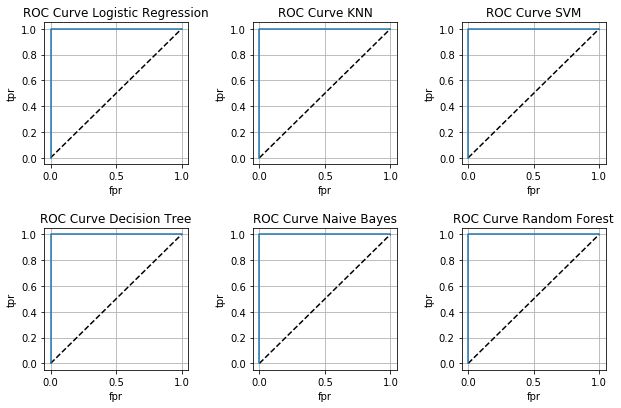

In [44]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
yhat_pr = LR.predict_proba(X_test)
yhat_pr = yhat_pr[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr)
pltm.subplot(331)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve Logistic Regression')
pltm.grid(True)

# KNN Classification
yhat_pr1 = KNN.predict_proba(X_test)
yhat_pr1 = yhat_pr1[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr1)
pltm.subplot(332)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve KNN')
pltm.grid(True)

# SVM Classification
yhat_pr2 = SVM.predict_proba(X_test)
yhat_pr2 = yhat_pr2[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr2)
pltm.subplot(333)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve SVM')
pltm.grid(True)

# Decision Tree Classification
yhat_pr3 = DT.predict_proba(X_test)
yhat_pr3 = yhat_pr3[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr3)
pltm.subplot(334)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve Decision Tree')
pltm.grid(True)

# Naive Bayes Classification
yhat_pr4 = NB.predict_proba(X_test)
yhat_pr4 = yhat_pr4[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr4)
pltm.subplot(335)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve Naive Bayes')
pltm.grid(True)

# Random Forest Classification
yhat_pr5 = RF.predict_proba(X_test)
yhat_pr5 = yhat_pr5[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr5)
pltm.subplot(336)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('fpr')
pltm.ylabel('tpr')
pltm.title('ROC Curve Random Forest')
pltm.grid(True)
pltm.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
pltm.show()

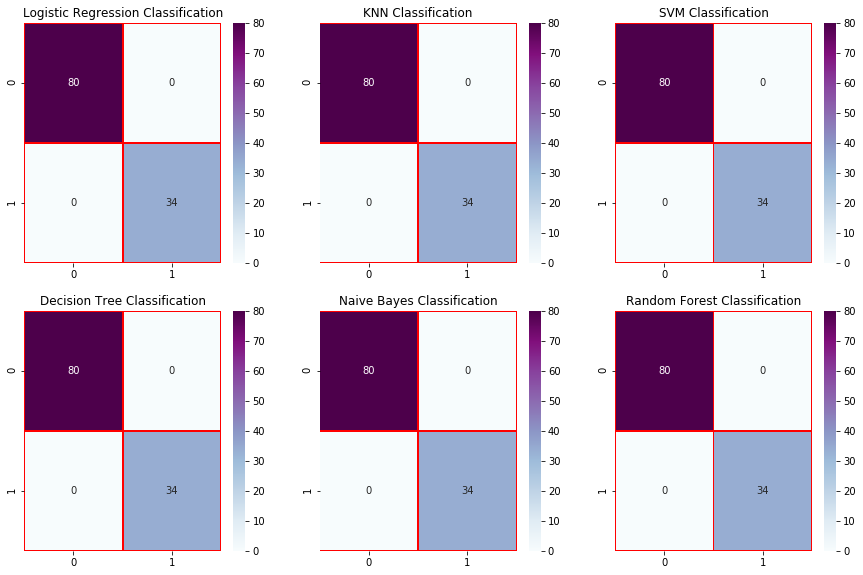

In [46]:
# Comparing Canfusion Matrices of differend ML classifications.

fig = pltm.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('KNN Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Naive Bayes Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')
sb.heatmap(data=LR_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sb.heatmap(data=KNN_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)  
sb.heatmap(data=SVM_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3)
sb.heatmap(data=DT_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax4)
sb.heatmap(data=NB_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
sb.heatmap(data=RF_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax6)
pltm.show()

### Results.


All of models demonstrated 100% precision when predicting breast cancer. 